In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/SEM2/alldatacleaned.csv")
df.head()

,NumberofTweets,NumberofFollowing,NumberofFollowers,Picture,Video,Content,NumberOfComments,NumberOfRetweets,NumberOfLikes,tweetage,numberOfHashtags,numberOfTags,numberOfURLs,language
0,2610,51,35700,1,0,"No somos argentinas, pero bebemos mate y amam...",14,25,186,4,0,1,0,es
1,1390,277,159100,1,0,"Hi, \n@Wimbledon\n",68,186,3700,4,0,1,0,en
2,6088,431,45600,1,0,"Yapabilirsin, başarabilirsin. Madalyalar kazan...",0,19,255,4,1,0,0,tr
3,408,71,49800,0,0,Au revoir Paris ! I’ll come back stronger next...,64,91,2200,4,0,0,0,en
4,2126,143,13200,0,0,On my way to steal yo man,68,183,1700,4,0,0,0,en


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5065 entries, 0 to 5064
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   NumberofTweets     5065 non-null   int64 
 1   NumberofFollowing  5065 non-null   int64 
 2   NumberofFollowers  5065 non-null   int64 
 3   Picture            5065 non-null   int64 
 4   Video              5065 non-null   int64 
 5   Content            4774 non-null   object
 6   NumberOfComments   5065 non-null   int64 
 7   NumberOfRetweets   5065 non-null   int64 
 8   NumberOfLikes      5065 non-null   int64 
 9   tweetage           5065 non-null   int64 
 10  numberOfHashtags   5065 non-null   int64 
 11  numberOfTags       5065 non-null   int64 
 12  numberOfURLs       5065 non-null   int64 
 13  language           5065 non-null   object
dtypes: int64(12), object(2)
memory usage: 554.1+ KB


In [ ]:
df.isnull().sum()

NumberofTweets         0
NumberofFollowing      0
NumberofFollowers      0
Picture                0
Video                  0
Content              291
NumberOfComments       0
NumberOfRetweets       0
NumberOfLikes          0
tweetage               0
numberOfHashtags       0
numberOfTags           0
numberOfURLs           0
language               0
dtype: int64

In [ ]:
df1=df.drop(['Content'],axis=1)
df1

,NumberofTweets,NumberofFollowing,NumberofFollowers,Picture,Video,NumberOfComments,NumberOfRetweets,NumberOfLikes,tweetage,numberOfHashtags,numberOfTags,numberOfURLs,language
0,2610,51,35700,1,0,14,25,186,4,0,1,0,es
1,1390,277,159100,1,0,68,186,3700,4,0,1,0,en
2,6088,431,45600,1,0,0,19,255,4,1,0,0,tr
3,408,71,49800,0,0,64,91,2200,4,0,0,0,en
4,2126,143,13200,0,0,68,183,1700,4,0,0,0,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5060,15000,1382,235,0,0,22,33,282,2,4,0,1,ar
5061,15000,1382,235,1,0,26,38,318,2,4,0,1,unknown
5062,413,39,12900000,0,0,2700,751,1900,4,1,2,1,unknown
5063,15000,1382,235,1,0,27,38,321,2,4,0,1,ar


In [ ]:
df1['language'].values

array(['es', 'en', 'tr', ..., 'unknown', 'ar', 'unknown'], dtype=object)

In [ ]:
#importation of librairies
import numpy as np
import pandas as pd
import numpy as np; np.random.seed(0)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_absolute_error,r2_score 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder= LabelEncoder()
df1['language']=encoder.fit_transform(df1['language'])
df1

,NumberofTweets,NumberofFollowing,NumberofFollowers,Picture,Video,NumberOfComments,NumberOfRetweets,NumberOfLikes,tweetage,numberOfHashtags,numberOfTags,numberOfURLs,language
0,2610,51,35700,1,0,14,25,186,4,0,1,0,11
1,1390,277,159100,1,0,68,186,3700,4,0,1,0,10
2,6088,431,45600,1,0,0,19,255,4,1,0,0,51
3,408,71,49800,0,0,64,91,2200,4,0,0,0,10
4,2126,143,13200,0,0,68,183,1700,4,0,0,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5060,15000,1382,235,0,0,22,33,282,2,4,0,1,1
5061,15000,1382,235,1,0,26,38,318,2,4,0,1,52
5062,413,39,12900000,0,0,2700,751,1900,4,1,2,1,52
5063,15000,1382,235,1,0,27,38,321,2,4,0,1,1


In [ ]:
df1.duplicated().sum()

19

In [ ]:
df2 = df1.drop_duplicates()
df2.duplicated().sum()

0

In [ ]:
df2.describe()

,NumberofTweets,NumberofFollowing,NumberofFollowers,Picture,Video,NumberOfComments,NumberOfRetweets,NumberOfLikes,tweetage,numberOfHashtags,numberOfTags,numberOfURLs,language
count,5.046000e+03,5046.000000,5.046000e+03,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000
mean,3.976937e+04,766.671423,2.175250e+06,0.227903,0.130004,144.170036,1317.941538,4321.305192,3.104241,0.890805,0.316885,0.180737,32.714427
std,7.797486e+04,2022.942239,5.036073e+06,0.419521,0.336341,1125.545292,6962.563392,26072.791927,1.165678,1.787238,0.982937,0.400982,21.505108
min,2.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,8.925000e+01,103.000000,2.400000e+01,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,10.000000
50%,1.867500e+03,316.000000,1.700000e+02,0.000000,0.000000,2.000000,8.000000,27.000000,4.000000,0.000000,0.000000,0.000000,52.000000
75%,3.377500e+04,848.000000,3.645000e+04,0.000000,0.000000,32.000000,220.000000,658.750000,4.000000,1.000000,0.000000,0.000000,52.000000
max,1.100000e+06,114100.000000,5.420000e+07,1.000000,1.000000,39300.000000,223300.000000,1000000.000000,4.000000,42.000000,19.000000,3.000000,56.000000


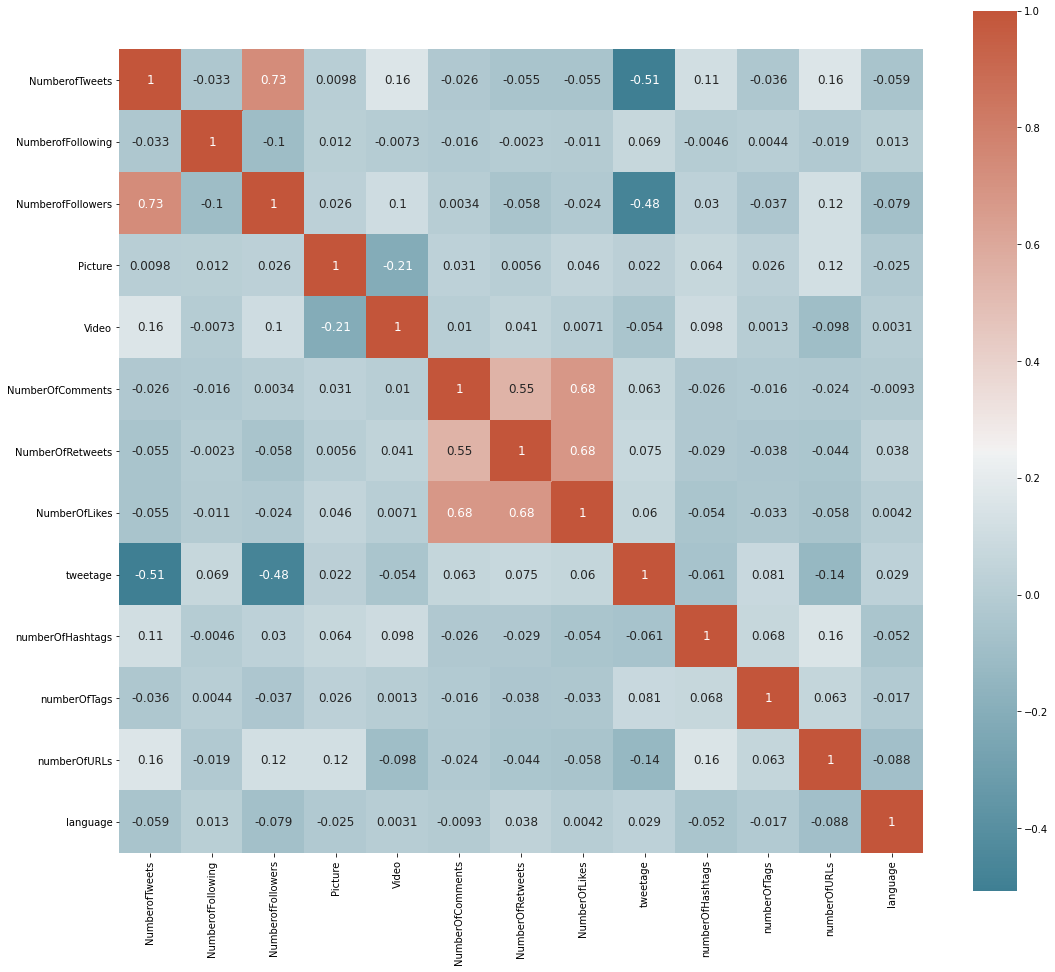

In [ ]:
def plot_correlation_map( df2):

    corr = df2.corr()

    s , ax = plt.subplots( figsize =( 18 , 18 ) )

    cmap = sns.diverging_palette( 220 , 20 , as_cmap = True )


    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
    
plot_correlation_map( df2)

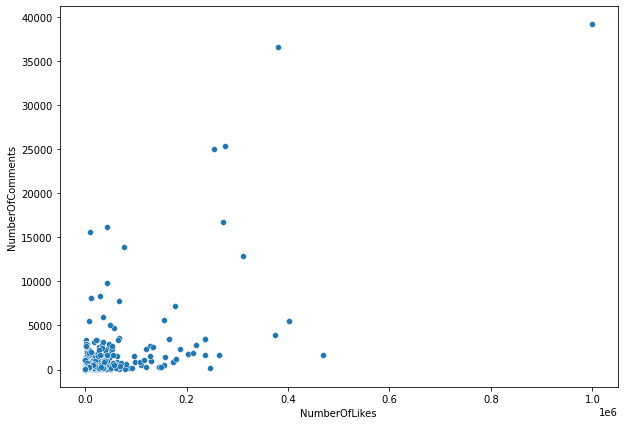

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data= df2, x='NumberOfLikes', y='NumberOfComments')

#Linear Regression

In [ ]:
X=df2['NumberOfLikes'].values[:,np.newaxis]
y=df2['NumberOfComments'].values
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=30)

In [ ]:
model=LinearRegression()

model.fit(X_train,y_train)
predicted=model.predict(X_test)

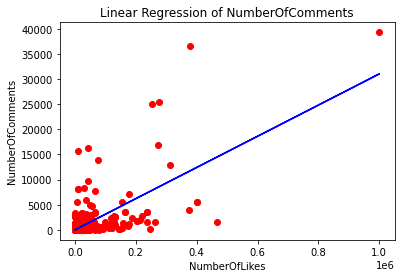

In [ ]:
plt.scatter(X,y,color='r')
plt.title('Linear Regression of NumberOfComments')
plt.xlabel('NumberOfLikes')
plt.ylabel('NumberOfComments')
plt.plot(X,model.predict(X),color='b')
plt.show()

In [ ]:
print("MSE:",metrics.mean_squared_error(y_test,predicted))
print("R squared:",metrics.r2_score(y_test,predicted))

MSE: 469473.4902178999
R squared: 0.2151549342780914


==> R squared is less than 0.5 it means that the models doesn't fit the data.

# Multi-linear Regression

In [ ]:
X1=df2[['NumberOfLikes','tweetage']]
y1=df2['NumberOfComments'].values
X1_train,X1_test,y1_train,y1_test= train_test_split(X1,y1,test_size=0.20,random_state=30)
#Fitting the model to our data
model_1=LinearRegression()
model_1.fit(X1_train,y1_train)
predicted_1=model_1.predict(X1_test)
#Testing model's performances
print("MSE:",metrics.mean_squared_error(y1_test,predicted_1))
print("R squared:",metrics.r2_score(y1_test,predicted_1))

MSE: 469394.29070962727
R squared: 0.21528733652139287


# Polynomial Regression

In [ ]:
X2=df2[['NumberOfLikes','NumberofTweets','Picture']]
y2=df2['NumberOfComments'].values
#Split data
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.20,random_state=30)
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)
#Apply Polynomian transformation on input
X2_train_=poly.fit_transform(X2_train)
lg.fit(X2_train_,y2_train)
X2_test_=poly.fit_transform(X2_test)
predicted_2=lg.predict(X2_test_)
print("MSE:",metrics.mean_squared_error(y2_test,predicted_2))
print("R squared:",metrics.r2_score(y2_test,predicted_2))

MSE: 445457.18379993975
R squared: 0.2553043356431246


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


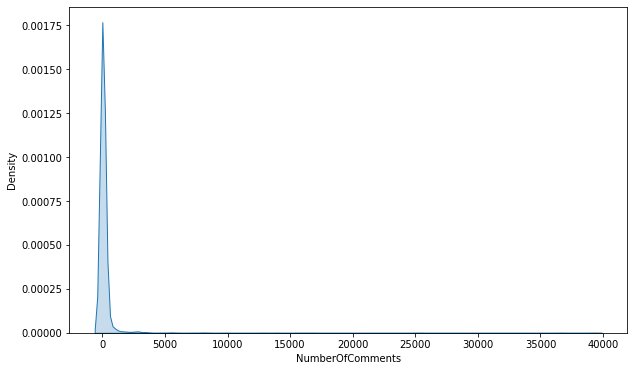

In [ ]:
#Use a density plot
plt.figure(figsize=(10,6))
sns.distplot(df2['NumberOfComments'],hist=False,kde=True,bins=20,kde_kws={'linewidth': 1,'shade':True},hist_kws={'edgecolor':'black'})

In [ ]:
#zscore
z1=np.abs(stats.zscore(df2.NumberOfComments))
df2_1=df2[(z1<2.5)]
print('Number of removed rows',df2.shape[0]-df2_1.shape[0])

Number of removed rows 34


In [ ]:
#split data
X3=df2.drop(['NumberOfComments'],axis=1)
y3=df2['NumberOfComments'].values
X3_train,X3_test,y3_train,y3_test= train_test_split(X3,y3,test_size=0.20,random_state=30)

#build 3 models 

In [ ]:
names=['Linear Regression','Random Forest Regressor']
Regressors = [LinearRegression(), RandomForestRegressor()]

In [ ]:
for name,Reg in zip(names, Regressors) :
      Reg.fit(X3_train, y3_train)
      preds = Reg.predict(X3_test)
      MAE = mean_absolute_error(y3_test,preds)
      R2 = r2_score(y3_test,preds)
      print (name, ' : name absolute error : ', "%.2f" %(MAE), 'R2_score : ', "%.2f" %(R2))

Linear Regression  : name absolute error :  155.66 R2_score :  0.19
Random Forest Regressor  : name absolute error :  115.97 R2_score :  -0.34


##Xgboost

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor

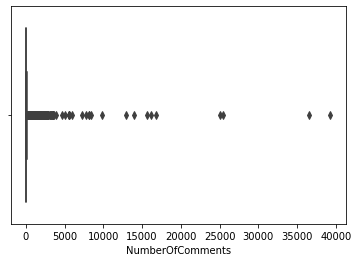

In [ ]:
sns.boxplot(x=df['NumberOfComments'])

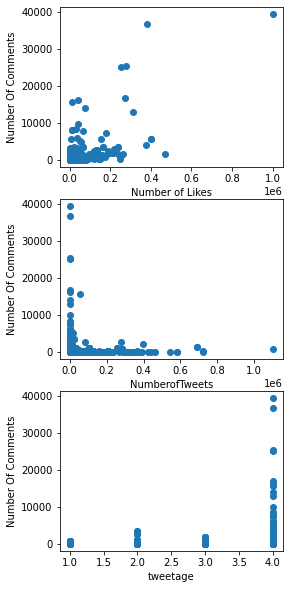

In [ ]:
fig, ax = plt.subplots(3,figsize=(4,10))
ax[0].scatter(df2['NumberOfLikes'],df2['NumberOfComments'])
ax[0].set_xlabel('Number of Likes')
ax[0].set_ylabel('Number Of Comments')
ax[1].scatter(df2['NumberofTweets'],df2['NumberOfComments'])
ax[1].set_xlabel('NumberofTweets')
ax[1].set_ylabel('Number Of Comments')
ax[2].scatter(df2['tweetage'],df2['NumberOfComments'])
ax[2].set_xlabel('tweetage')
ax[2].set_ylabel('Number Of Comments')
plt.show()

##Z-score

In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df2))

In [ ]:
l = sorted(list(set.union(set(np.where(z > 2.5)[0]),set(np.where(z < -2.5)[0]))))
df2.drop(df2.index[l], inplace=True,axis=0)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


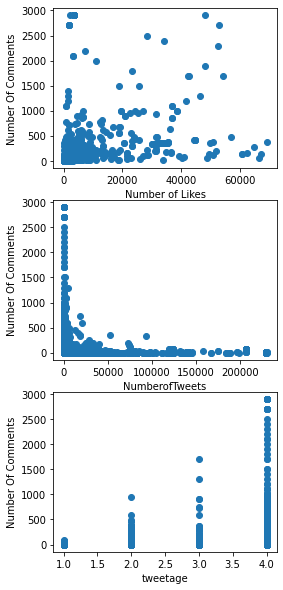

In [ ]:
fig, ax = plt.subplots(3,figsize=(4,10))
ax[0].scatter(df2['NumberOfLikes'],df2['NumberOfComments'])
ax[0].set_xlabel('Number of Likes')
ax[0].set_ylabel('Number Of Comments')
ax[1].scatter(df2['NumberofTweets'],df2['NumberOfComments'])
ax[1].set_xlabel('NumberofTweets')
ax[1].set_ylabel('Number Of Comments')
ax[2].scatter(df2['tweetage'],df2['NumberOfComments'])
ax[2].set_xlabel('tweetage')
ax[2].set_ylabel('Number Of Comments')
plt.show()

##Splitting data

In [ ]:
df2 = df2[df2.NumberOfComments < 100]

In [ ]:
X= df2[['NumberofTweets', 'NumberofFollowing', 'NumberofFollowers' ,'NumberOfLikes' , 'Picture',
       'Video', 'tweetage', 'numberOfHashtags', 'numberOfTags', 'numberOfURLs','language']]
y = np.log10(df2['NumberOfComments'] + 1)
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=30)

In [ ]:
Scaler = StandardScaler()
Scaler.fit
Scaler.fit(X_train[['NumberofTweets', 'NumberofFollowing', 'NumberofFollowers' ,  'numberOfHashtags','tweetage']])
X_train[['NumberofTweets', 'NumberofFollowing', 'NumberofFollowers' ,  'numberOfHashtags','tweetage']] = Scaler.transform(X_train[['NumberofTweets', 'NumberofFollowing', 'NumberofFollowers' ,  'numberOfHashtags','tweetage']])
X_test[['NumberofTweets', 'NumberofFollowing', 'NumberofFollowers' ,  'numberOfHashtags','tweetage']] = Scaler.transform(X_test[['NumberofTweets', 'NumberofFollowing', 'NumberofFollowers' ,  'numberOfHashtags','tweetage']])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

##Mutual information

In [ ]:
import sklearn.feature_selection as fs
yt = [i for i in y_train]
featurerank = fs.mutual_info_regression(X_train,yt)
feature_scores = []
included_features = X_train.columns
for i in np.arange(len(included_features)):
  feature_scores.append([included_features[i],featurerank[i]])
sorted_scores = sorted(np.array(feature_scores),key=lambda s: float(s[1]), reverse=True)
print(np.array(sorted_scores))

[['NumberOfLikes' '0.7209880356609606']
 ['NumberofTweets' '0.374018247683348']
 ['NumberofFollowing' '0.37057027533005193']
 ['NumberofFollowers' '0.3566618007996549']
 ['language' '0.0815744390621127']
 ['tweetage' '0.07998880452387569']
 ['numberOfHashtags' '0.05282057378690652']
 ['numberOfURLs' '0.05083244486310834']
 ['numberOfTags' '0.034180130693731936']
 ['Picture' '0.012570038561768637']
 ['Video' '0.0']]


In [ ]:
featureranking = fs.f_regression(X_train,yt)
feature_scoring = []
for i in np.arange(len(included_features)):
  feature_scoring.append([included_features[i],featureranking[0][i]])
sorted_sc = sorted(np.array(feature_scoring),key=lambda s: float(s[1]), reverse=True)
print(np.array(sorted_sc))

[['NumberofFollowers' '423.7584756746586']
 ['NumberofTweets' '270.56277717911814']
 ['NumberOfLikes' '246.9065090018447']
 ['Video' 'nan']
 ['tweetage' '36.285279235817306']
 ['numberOfURLs' '34.10071729295742']
 ['numberOfTags' '33.28517389146257']
 ['language' '6.560713138639441']
 ['Picture' '6.384394191303427']
 ['numberOfHashtags' '1.6783819928236894']
 ['NumberofFollowing' '0.06461107368201076']]


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


In [ ]:
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(rfr(n_estimators = 100))
sel.fit(X_train, y_train)
sel.get_support()
X_train.columns[(sel.get_support())]

Index(['NumberOfLikes'], dtype='object')

In [ ]:
from sklearn.decomposition import PCA
d = {}
for i in range(len(X_train.columns)-1):
  for j in range(i+1,len(X_train.columns)):
    aa = X_train[[X_train.columns[i],X_train.columns[j]]]
    pca = PCA(n_components=1)
    aa = pca.fit_transform(aa)
    d[X_train.columns[i] + ' ' + X_train.columns[j]] = pca.explained_variance_ratio_
d

{'NumberOfLikes Picture': array([0.99999996]),
 'NumberOfLikes Video': array([1.]),
 'NumberOfLikes language': array([0.99991277]),
 'NumberOfLikes numberOfHashtags': array([0.99999981]),
 'NumberOfLikes numberOfTags': array([0.99999996]),
 'NumberOfLikes numberOfURLs': array([0.99999997]),
 'NumberOfLikes tweetage': array([0.99999981]),
 'NumberofFollowers NumberOfLikes': array([0.99999981]),
 'NumberofFollowers Picture': array([0.84338624]),
 'NumberofFollowers Video': array([1.]),
 'NumberofFollowers language': array([0.99789678]),
 'NumberofFollowers numberOfHashtags': array([0.60900791]),
 'NumberofFollowers numberOfTags': array([0.82982078]),
 'NumberofFollowers numberOfURLs': array([0.89008835]),
 'NumberofFollowers tweetage': array([0.71927245]),
 'NumberofFollowing NumberOfLikes': array([0.99999981]),
 'NumberofFollowing NumberofFollowers': array([0.59617514]),
 'NumberofFollowing Picture': array([0.84208254]),
 'NumberofFollowing Video': array([1.]),
 'NumberofFollowing langu

In [ ]:
X_train = X_train.drop(columns=[ 'Video', 'Picture','language' ,'numberOfURLs' , 'numberOfTags'])
X_test = X_test.drop(columns=[ 'Video', 'Picture' , 'language' ,'numberOfURLs' , 'numberOfTags'])

In [ ]:
X_test.head()

,NumberofTweets,NumberofFollowing,NumberofFollowers,NumberOfLikes,tweetage,numberOfHashtags
4895,-0.501832,-0.486829,-0.352735,4,0.742788,0.250255
2773,-0.497527,0.907630,-0.352699,4,0.742788,1.119795
1436,-0.488528,-0.327902,-0.352638,1800,0.742788,0.250255
143,-0.502291,-0.282787,-0.352744,516,-0.138770,1.119795
2336,-0.473636,-0.656010,-0.352732,0,0.742788,1.119795


In [ ]:
param_tuning = {
        'max_depth': [8],
        'min_child_weight': [1],
        'subsample': [0.6],
        'colsample_bytree': [0.6],
        'n_estimators' : [2000],
        'objective': ['reg:squarederror']
}

xgb_model = XGBRegressor()

gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = 'neg_median_absolute_error',
                           cv = 20,
                           n_jobs = -1,
                           verbose = 1)

gsearch.fit(X_train,y_train)

Fitting 20 folds for each of 1 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.3min finished


GridSearchCV(cv=20, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg...,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.6], 'max_depth': [8],
                         'min_child_weight': [1], 'n_estimators': [20

In [ ]:
bst = gsearch.best_estimator_
bst.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=8, min_child_weight=1, missing=None, n_estimators=2000,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=0.6, verbosity=1)

In [ ]:
bst.save_model("commentsmodel.bin")
model_xgb = xgb.Booster()
model_xgb.load_model("commentsmodel.bin")

In [ ]:
X_test.head()

,NumberofTweets,NumberofFollowing,NumberofFollowers,NumberOfLikes,tweetage,numberOfHashtags
4895,-0.501832,-0.486829,-0.352735,4,0.742788,0.250255
2773,-0.497527,0.907630,-0.352699,4,0.742788,1.119795
1436,-0.488528,-0.327902,-0.352638,1800,0.742788,0.250255
143,-0.502291,-0.282787,-0.352744,516,-0.138770,1.119795
2336,-0.473636,-0.656010,-0.352732,0,0.742788,1.119795


In [ ]:
y_pr = pd.Series(bst.predict(X_test))

In [ ]:
y_pr = pd.Series(bst.predict(X_test))

In [ ]:
mean_absolute_error(y_test, y_pr)

0.15214884611803162

In [ ]:
df2['NumberOfComments'].describe()

count    3423.000000
mean        9.847210
std        18.849376
min         0.000000
25%         0.000000
50%         1.000000
75%        10.000000
max        99.000000
Name: NumberOfComments, dtype: float64

In [ ]:
X_train.head()

,NumberofTweets,NumberofFollowing,NumberofFollowers,NumberOfLikes,tweetage,numberOfHashtags
2277,-0.502009,-0.477601,-0.352736,7,0.742788,-0.619285
795,0.771580,-0.038756,-0.352708,12,-1.020328,2.858876
4060,1.692629,0.031992,0.560862,29,-1.901886,0.250255
4745,-0.502044,-0.652934,-0.352742,579,0.742788,-0.619285
4666,-0.501709,-0.682669,-0.352744,444,0.742788,0.250255


In [ ]:
import joblib
filename = 'Scaler.sav'
joblib.dump(Scaler, filename)
loaded_model = joblib.load(filename)

In [ ]:
import pickle
with open('Scaler.pkl', 'wb') as pkl:
    pickle.dump(Scaler, pkl)
with open('Scaler.pkl', 'rb') as pkl:
    pickle_preds = pickle.load(pkl)